# Supervised Learning- Logistic Regressions

Unlike linear regression, logistic regression does not try to predict the value of a numeric variable given a set of inputs. Instead, the output of logistic regression is the probability of a given point belonging to a specific class.

To understand the use of logistic regression, let's consider the following example. Suppose that you have dataset containing information about income and voting preferences. For this dataset, you can see that low-income voters tend to vote for candidate B, while high-income voters tend to favor candidate A.

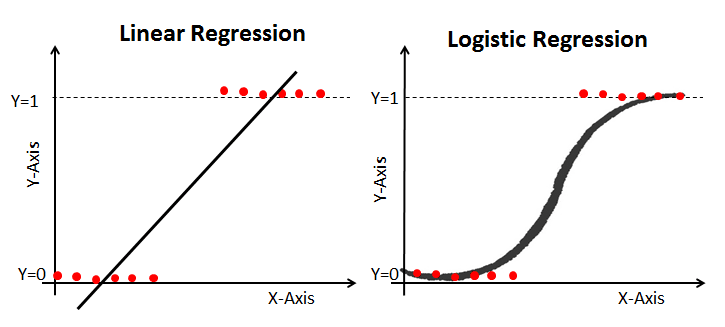

With this dataset, you would be very interested in trying to predict which candidate future voters will vote for based on their income level. At first glance, you might be tempted to apply what you have previously learned: a linear regression. The image on the left shows would happen when we apply linear regression to this problem.

The main problem with linear regression is that the predicted value doesn't always fall within an expected range. The image on the right shows how logistic regression solves this problem. Instead of drawing a straigh line cutting through the points, you now use a curved line to try to fit all the points on the chart.

Using logistic regression, the output will be a value from 0 to 1, where anything less than (or equal to ) 0.5 (known as the threshold) will be considered as voting for candidate B, and anything greater than 0.5 will be considered as voting for candidate A.

## Understanding Odds

Before we discuss the details of the logistic regression algorithm, we first need to discuss one import term -- *odds*. Odds are defined as the ratio of the probability of success to the probability of failure.

We use $p$ to represent the probability of an event occuring.

$$
\text{Odds for an even}=\frac{\text{Chances of something happening}}{\text{Chances of something not happening}}=\frac{p}{1-p}
$$

For example, the odds of landing a head when you flip a coin are 1. This is because you hae 0.5 probability of landing a head and 0.5 probability of landing a tail. So when you say that the odds of landing a head are 1, this means you have a 50 percent chance of landing a head.

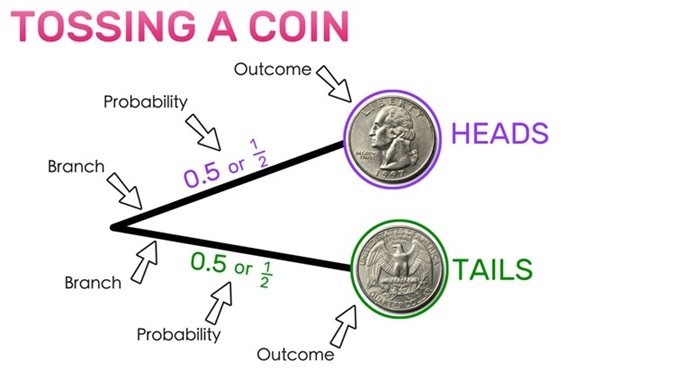

But if the coin is rigged in such a way that the probability of landing a head is 0.8 and the probability of landing a tail is 0.2, then the odds of landing a head is $\frac{0.8}{0.2}=4$. This means, you are 4 times more likely to land a head than a tail. 

Likewise, the odds of getting a tail are $\frac{0.2}{0.8}=0.25$

## Logit Function

Applying a natural logarithm function to the odds of an event, you get the logit function. The logit function is the logarithm of the odds.

$$
L=\ln\bigg(\frac{p}{1-p}\bigg)
$$

The logit function transfers a variable on the domain $(0,1)$ into a new variable on $(-\infty, \infty)$. 

### Importing the Modules

To understand this relationship, we are going to create an example using the `pandas`, `numpy`, and `matplotlib` libraries.

C:\Users\andre\AppData\Local\Temp\ipykernel_11832\615105658.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Text(0, 0.5, 'Logit -L')

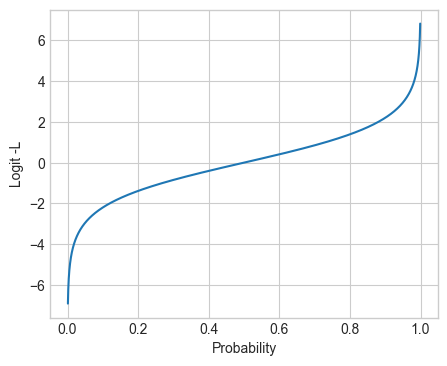

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

def logit(x):
    return np.log(x / (1-x))

x = np.arange(0.001, 0.999, 0.0001)
y = [logit(n) for n in x]
plt.figure(figsize=(5,4))
plt.plot(x, y)
plt.xlabel("Probability")
plt.ylabel("Logit -L")

## Sigmoid Curve

For the logit curve, observe that the x-axis is the probability and the y-axis is the real-number range. For logistic regression, what we really want is a function that maps numbers on the real-number system to the probabilities, which is exactly what we get when we flip the axes of the logit curve.

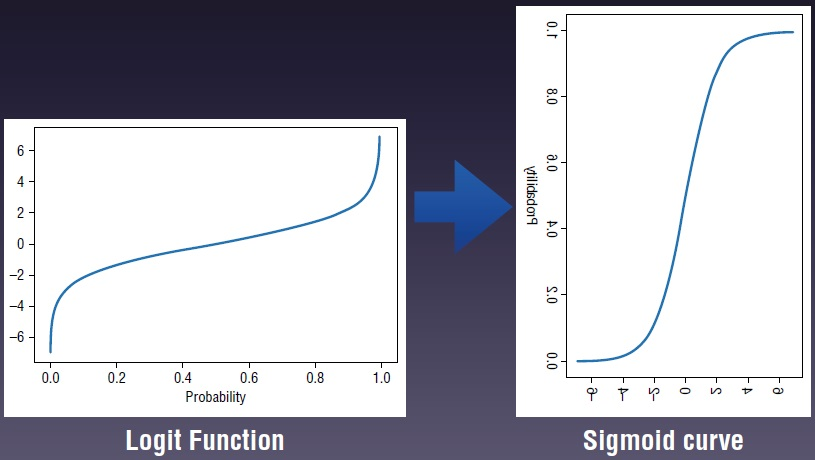

When you flip the axes, the curve that you get is called the *sigmoid curve*. The sigmoid curve is obtained by using the *Sigmoid function*, which is the inverse of the logit function. The Sigmoid function is used to transform the values $(-\infty, \infty)$ into numbers on $(0,1)$. The formula for the sigmoid function is

$$
p=\frac{1}{(1+e^{-L})}
$$

We can create a function that demonstrates the sigmoid function.

Text(0, 0.5, 'Probability')

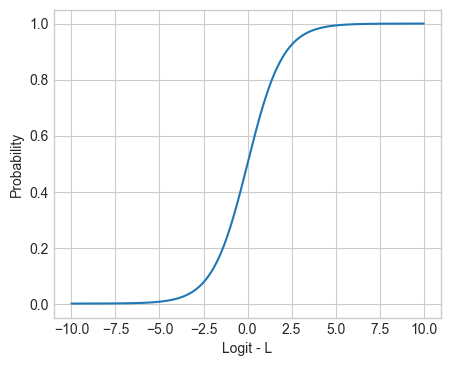

In [2]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

x = np.arange(-10, 10, 0.0001)
y = [sigmoid(n) for n in x]
plt.figure(figsize=(5,4))
plt.plot(x, y)
plt.xlabel("Logit - L")
plt.ylabel("Probability")

Just like you try to plot a straight line that fits through all of the points in linear regression, in logistics regression, we would also like to plot a sigmoid curve that fits through all of the points.

Matheamtically, this can be expressed by the following formula:

$$
p=\frac{1}{(1+e^{-(\beta_0+\beta_1x_1)})}
$$

Recall that the formula for the regression line is $\hat{y}=\beta_0+\beta_1x_1$, where $\beta_0$ is the y-intercept and $\beta_1$ is the coefficient for $x_1$. Here, we just replace $L$ for $\hat{y}$.

Just like a linear regression, the coefficients $\beta_0$ and $\beta_1$ are unknown, and they must be estimated based on the available training data. To estimate this, we use a technique known as *Maximum Likelihood Estimation (MLE)$.

## Breast Cancer Wisconsin (Dianostic) Data Set

Sckit-learn has the Breast Cancer Wisconsin (Diagnostic) Data Set. It's a classic dataset that is often used to work with binary classifications. This dataset has 30 features, and they are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.

The label of the dataset is a binary classication--M for malignant or B for benign. You can learn more about this data set by visitng the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic).

### Examining the relationship between Features

You can load the Breast Cancer dataset by first importing the `datasets` module from `sklearn`. Then use the `load_breast_cancer()` function as follows:

In [3]:
# importing the dataset and assigning to variable cancer
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

### Plotting the Features in 2D

For a start, let's plot the first two features of the dataset in 2D and examine their relationships. We're going to copy the first two features of the dataset into a two-dimensional list. Then we will create a scatterplot showing the distribution of points for the two features.

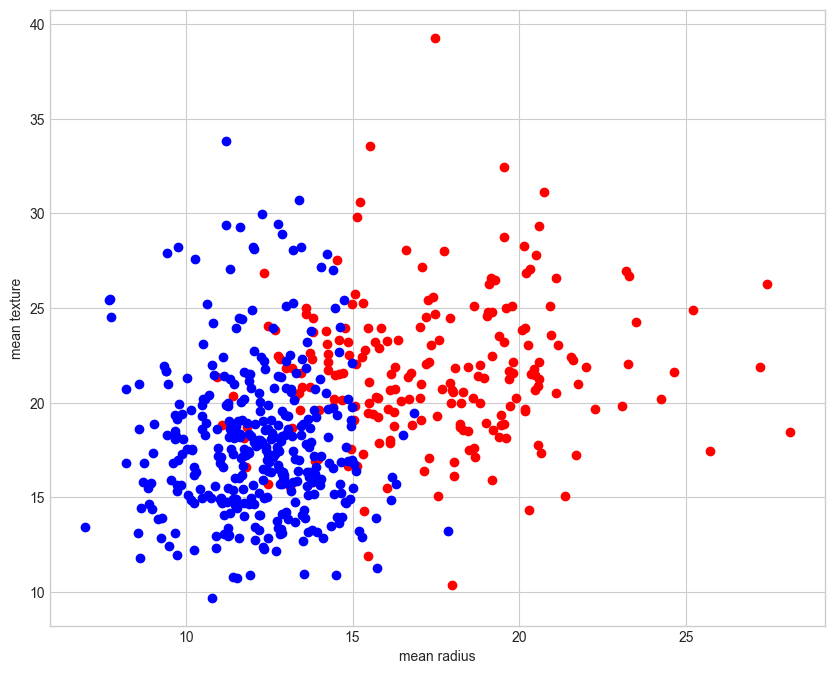

In [4]:
#---copy from dataset into a 2-d list---

X = []
for target in range(2):
    X.append([[], []])
    for i in range(len(cancer.data)): # target is 0 or 1
        if cancer.target[i] == target:
            X[target][0].append(cancer.data[i][0]) # first feature - mean radius
            X[target][1].append(cancer.data[i][1]) # second feature — mean texture
            
colours = ("r", "b") # r: malignant, b: benign
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

for target in range(2):
    ax.scatter(X[target][0],
               X[target][1],
               c=colours[target])

ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
plt.show()


From the scatter plot, you can assume that as the tumor grows in radius and increases in texture, the more likely that it would be diagnosed as malignant.

# Plotting in 3D

We've plotted two features using a scatterplot. It would be intersting to be able to visulize more than two features. In this case, let's try to visualize the relationship between three features.

You can use matplotlib to plot a 3D plot. The following code chunk shows how this is done. It's very similiar to the code chunk from above.

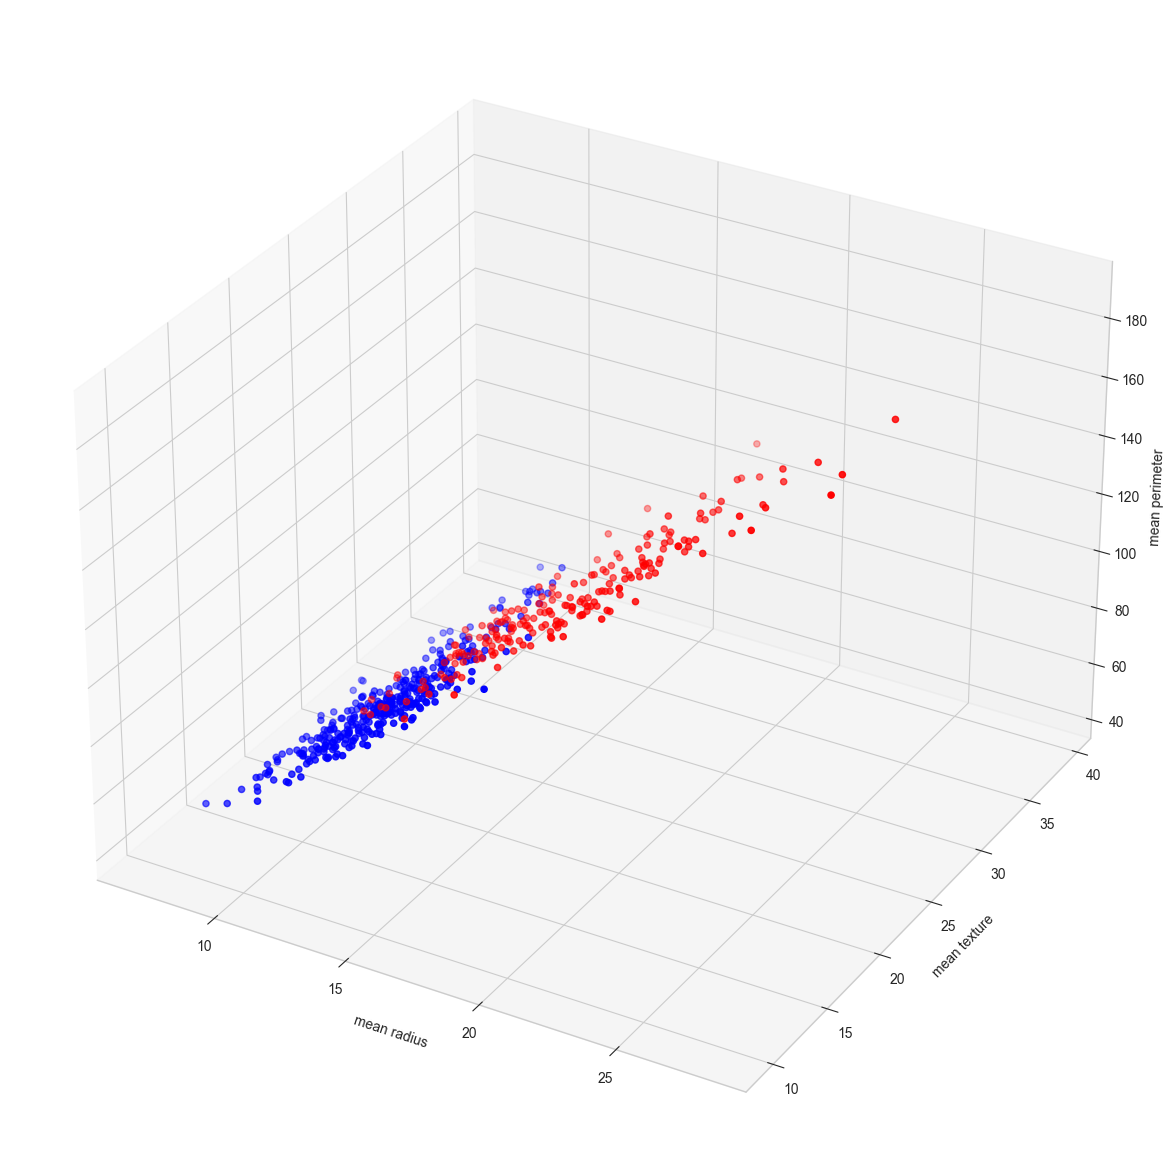

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
#---copy from dataset into a 2-d array---
X = []
for target in range(2):
    X.append([[], [], []])
    for i in range(len(cancer.data)): # target is 0,1
        if cancer.target[i] == target:
            X[target][0].append(cancer.data[i][0])
            X[target][1].append(cancer.data[i][1])
            X[target][2].append(cancer.data[i][2])

colors = ("r", "b") # r: malignant, b: benign
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
for target in range(2):
    ax.scatter(X[target][0],
               X[target][1],
               X[target][2],
               c=colors[target])
    
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
ax.set_zlabel("mean perimeter")
plt.show()

## Training Using One Feature

Let's now use logistic regression to try to predict if a tumor is cancerous. To get started, let's use only the first feature of the dataset: mean radius. 

C:\Users\andre\AppData\Local\Temp\ipykernel_11832\304353122.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X,y,


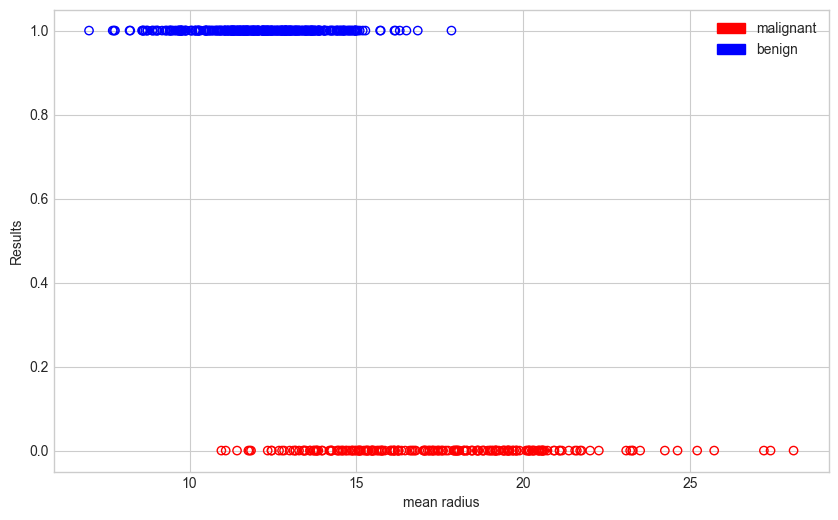

In [6]:
import matplotlib.patches as mpatches

cancer = load_breast_cancer()
X = cancer.data[:, 0]
y = cancer.target
color = {0: 'red', 1: 'blue'}

plt.figure(figsize=(10, 6))
plt.scatter(X,y, 
            facecolors = 'none',
            edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x: colors[x]),
            cmap=colors)

plt.xlabel("mean radius")
plt.ylabel("Results")

red = mpatches.Patch(color = 'red', label = 'malignant')
blue = mpatches.Patch(color = 'blue', label = 'benign')

plt.legend(handles = [red, blue], loc =1)

As you can see, this is good opportunity to use logisitic regression to predict if a tumor is cancerous. You could try to plot an sigmoid curve.

### Finding the Intercept and Coefficient

Scikit-learn comes with the `LogisticRegression` class that allows you to apply logistic regression to train a model. Thus, in this example, you are going to train a model using the first feature in the dataset.

In [9]:

from sklearn import linear_model
import numpy as np

log_regress = linear_model.LogisticRegression()

#---train the model---
log_regress.fit(X = np.array(X).reshape(len(X), 1),
                y=y)

#---print trained model intercept
print('The trained model intercept: {}'.format(log_regress.intercept_[0]))

#---print trained model coefficients---
print('The trained model coefficients: {}'.format(log_regress.coef_[0][0]))


The trained model intercept: 15.120902004497589
The trained model coefficients: -1.0247560866198686


Once the model is trained, we're more interested in the intercept $(\beta_0)$ and coefficients $(\beta_1x_1)$. Knowing these two values allows us to plot the sigmoid curve that tries to fit the points on the chart.


### Ploting the Sigmoid Curve

Now that we have the values for $B_0$ and $\beta_1x_2$.

Text(0, 0.5, 'Probability')

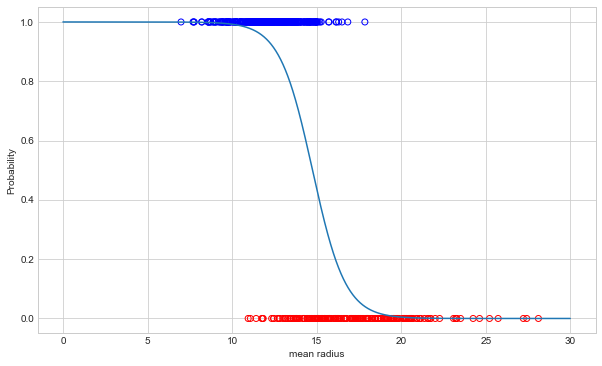

In [8]:
def sigmoid(x):
    return (1 / (1 +
        np.exp(-(log_regress.intercept_[0] +
        (log_regress.coef_[0][0] * x)))))

x1 = np.arange(0, 30, 0.01)
y1 = [sigmoid(n) for n in x1]

plt.figure(figsize=(10,6))
plt.scatter(X,y, 
    facecolors='none',
    edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x:
    colors[x]),
    cmap=colors)

plt.plot(x1,y1)
plt.xlabel("mean radius")
plt.ylabel("Probability")

### Making Predictions

Using the trained model, let's try to make some predictions. Let's try to predict the result if the mean radius is 20:

In [9]:
print(log_regress.predict_proba([[20]]))
print(log_regress.predict([[20]])[0])


[[0.99538685 0.00461315]]
0


As you can see from the output, the `predict_proba()` function in the statement returns a two-dimensional array. 


Recall that a logistic regression has binary labels: 0 and 1. Either the cancer is maligant or it's bengign. The result in the 0th index of the array shows the probability of the prediction being 0 (maligant) and the result in the 1st index shows the probability of the cancer being 1 (bengin).

The `predict()` function in the second statement returns the class that the result lies in (which in this case can be 0 or 1). The result of 0 tells us that the prediction of the tumor is malignant.

Let's try another example with the mean radius of 8 this time.

In [10]:

print(log_regress.predict_proba([[8]]))
print(log_regress.predict([[8]])[0])

[[9.84046071e-04 9.99015954e-01]]
1


As you can see from the result, the prediction is the tumor is bengin.

## Training the Model Using All Features

Earlier, we specifically trained the model using one feature. Let's now try and train the model using all the features and then see how well it can accurately perform the prediction.


Instead of training the model using all the rows in the dataset, you are going to split it into two sets: **one for taining and one for testing.** To do this, we used the `train_test_split()` function. This function allows you to split your data into random training and testing subsets. We split the dataset into $75\%$ training and $25\%$ testing.

In [11]:
# importing the function for training and testing
from sklearn.model_selection import train_test_split

# leaving 25% for the testing set and 75% for the traing set.
X_train, X_test, y_train, y_test = train_test_split(
                                    cancer.data,
                                    cancer.target,
                                    test_size = 0.25,
                                    random_state = 1,
                                    stratify = cancer.target)

The `random_state` parameter of the `train_test_split()` function specifies the seed used by the random number generator. If a number isn't choosen, `sklearn` will split the training and testing set different each time. Choosing a `random_state` parameter allows the results to be reproducable.

The `stratify` parameter allows you to specify which column (feature/label) to use so that the split is proportionate. For example, if the selected column is a categorical variable with $80\%$ 0s and $20\%$ 1s, then the both the training and test sets would each have $80\%$ 0s and $20\%$ 1s.

In this example, we are training it with all 30 features in the dataset. When the training done, we will see 30 coefficents for 30 features and the intercept.

In [12]:
from sklearn import linear_model
X = X_train[:, 0:30]
y = y_train
log_regress = linear_model.LogisticRegression()
log_regress.fit(X = X,
                y = y)

print(log_regress.intercept_)
print(log_regress.coef_)


[0.10306312]
[[ 0.58585494  0.53068028  0.50794228 -0.031153   -0.01622231 -0.09125037
  -0.12931205 -0.05121416 -0.02975389 -0.0043421   0.02731731  0.13772221
   0.02862439 -0.11141012 -0.00143341 -0.02156492 -0.02952204 -0.00686083
  -0.00559    -0.002062    0.67856782 -0.57417162 -0.30676036 -0.0066041
  -0.03276811 -0.30871373 -0.38854974 -0.10470481 -0.08850009 -0.02886605]]


c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Testing the Model

It's time to make a prediction. The following example uses the test set and feeds it into the model to obtain the predictions:

In [13]:
#---get the predicted probabilities and convert into a dataframe---
preds_prob = pd.DataFrame(log_regress.predict_proba(X=X_test))

#---assign column name to prediction
preds_prob.columns = ["Malignant", "Benign"]

#---get the predicted class labels---
preds = log_regress.predict(X=X_test)
preds_class = pd.DataFrame(preds)
preds_class.columns = ["Prediction"]

#---actual diagnosis---
original_result = pd.DataFrame(y_test)
original_result.columns = ["Original Result"]

#---merge the three dataframe into one---
result = pd.concat([preds_prob, preds_class, original_result], axis=1)
print(result.head())



   Malignant        Benign  Prediction  Original Result
0   0.999835  1.653140e-04           0                0
1   0.999750  2.501399e-04           0                0
2   0.174759  8.252405e-01           1                1
3   1.000000  6.166827e-09           0                0
4   0.087933  9.120669e-01           1                0


## Getting the Confusion Matrix

While it's useful to print out the predictions together with the original diagnosis from the test set, it does not give you a clear picture of how good the model is in predicting if a tumor is cancerous.

A more scientific way would be to use the *confusion matrix.* The confusion matrix shows the number of actual and predicted labels and how many of them are classified correctly. You can use Pandas's `crosstab()` function to print out the confusion matrix:

In [14]:
from sklearn import metrics

#---generate table of predictions vs actual
print("---Confusion Matrix---")
print(pd.crosstab(preds, y_test))

---Confusion Matrix---
col_0   0   1
row_0        
0      48   5
1       5  85


### Ploting the Confusion Matrix



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay



In [15]:
print("---Accuracy---")
print(log_regress.score(X = X_test,
                        y = y_test))

---Accuracy---
0.9300699300699301


In [16]:
# View summary of common classification metrics
print("---Metrices---")
print(metrics.classification_report(
    y_true= y_test,
    y_pred= preds
))

---Metrices---
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        53
           1       0.94      0.94      0.94        90

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



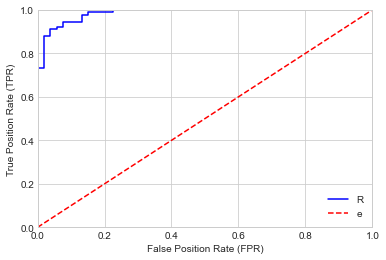

In [17]:
from sklearn.metrics import roc_curve, auc

#---find the predicted probabilities using the test set
probs = log_regress.predict_proba(X_test)
preds = probs[:,1]

#---find the FPR, TPR, and threhold---
fpr, tpr, threshold = roc_curve(y_test, preds)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0, 1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Position Rate (TPR)')
plt.xlabel('False Position Rate (FPR)')
plt.legend('Receiver Operating Character (ROC)')
plt.show()